# Analysis of Tables

In this notebook we will do the data analysis of the tables
  - Frequency of values
  - Univariate analysis of location
    - min, max, mode and mean values
    - Q1, Q2(median), Q3
  - Univariate analysis of variability or dispersion
    - Standard deviation, variance, inter-quartile range
  - Contingency tables: cross-frequency of values for two or more variables
  - Multivariate analysis of variability or dispersion
  - Covariance Matrix: variance between every pair of numeric variables, .i.e. how they vary together
  - Correlation Matrix: correlation between every pair of numeric variables, i.e. how a change in one variable will impact the other
  - Pearson Correlation Coefficient (ρ) (measures the linear correlation between two variables)
  - Spearman Rank-Order Correlation Coefficient
    - measures the strength and direction of monotonic association between two variables;
    - two variables can be related according to a type of non-linear but still
      monotonic relationship.

## Outlier analysis
  - Outliers can be univariate or multivariate
  - Statistical Parametric Techniques:
    - univariate case: boxplot definition (Tukey, 1977) is the most used one; any value outside the interval [Q1 −1.5×IQR,Q3 + 1.5×IQR]
    - multivariate case: Mahalanobis distance (Mahalanobis, 1936).
  - Statistical Non-parametric Techniques
    - Kernel functions


 

 

# Get data of each dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

account_data = pd.read_csv("../../assets/clean/account.csv")
card_data = pd.read_csv("../../assets/clean/card_dev.csv")
client_data = pd.read_csv("../../assets/clean/client.csv")
disp_data = pd.read_csv("../../assets/clean/disp.csv", dtype={"disp_id": int, "client_id": int, "account_id": int, "type": str})
district_data = pd.read_csv("../../assets/clean/district.csv")
loan_data = pd.read_csv("../../assets/clean/loan_dev.csv")
transaction_data = pd.read_csv("../../assets/clean/trans_dev.csv", dtype=
    {"trans_id": int, "account_id": int, "date": str, "type": str, "operation": str, "amount": float, "balance": float, "k_symbol": str, "bank": str, "account": str}
)

# Duplicate Values

In [11]:
print("Number of duplicates in account dataset: ", account_data.duplicated().sum())
print("Number of duplicates in card dataset: ", card_data.duplicated().sum())
print("Number of duplicates in client dataset: ", client_data.duplicated().sum())
print("Number of duplicates in disposition dataset: ", disp_data.duplicated().sum())
print("Number of duplicates in district dataset: ", district_data.duplicated().sum())
print("Number of duplicates in loans dataset: ", loan_data.duplicated().sum())
print("Number of duplicates in transactions dataset: ", transaction_data.duplicated().sum())

Number of duplicates in account dataset:  0
Number of duplicates in card dataset:  0
Number of duplicates in client dataset:  0
Number of duplicates in disposition dataset:  0
Number of duplicates in district dataset:  0
Number of duplicates in loans dataset:  0
Number of duplicates in transactions dataset:  0


# Show Frequency of values

## Frequency on account and card_dev datasets

The number of missing values is done in dataAnalysis notebook.
For disposition table, it's also done in dataAnalysis notebook, having a graph
representing the number of owners and disponents
Same on trans_dev table

Account: 
monthly issuance              4167
weekly issuance                240
issuance after transaction      93
Name: frequency, dtype: int64 

Account: 
classic    127
junior      41
gold         9
Name: type, dtype: int64 

Account: 
1    2724
0    2645
Name: gender, dtype: int64 



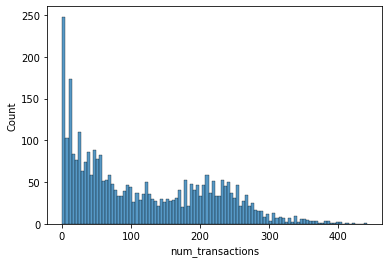

In [13]:
print(f"Account: \n{account_data['frequency'].value_counts()} \n")
print(f"Account: \n{card_data['type'].value_counts()} \n")
print(f"Account: \n{client_data['gender'].value_counts()} \n")


# Get the min, max, mode and median values  

In [18]:
# Calculate the min, max, mode and median values 

print(f"Client Data: \n")
print(f"Min: \n{client_data['birth_number'].min()}\n")
print(f"Max: \n{client_data['birth_number'].max()}\n")

print(f"District Data: \n")
#print(f"Min: \n{district_data['no. of inhabitants'].min()}\n")
#print(f"Max: \n{district_data['no. of inhabitants'].max()}\n")




Client Data: 

Min: 
1911-08-20

Max: 
1987-09-27

District Data: 



KeyError: 'no. of inhabitants'

# Plot the number of transactions per account

<AxesSubplot:xlabel='num_transactions', ylabel='Count'>

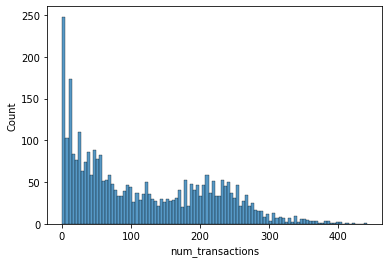

In [19]:
# get the number of transactions per account
account_transactions = transaction_data.groupby("account_id").size().reset_index(name="num_transactions")
# plot the distribution of the number of transactions per account
sns.histplot(account_transactions["num_transactions"], kde=False, bins=100)
